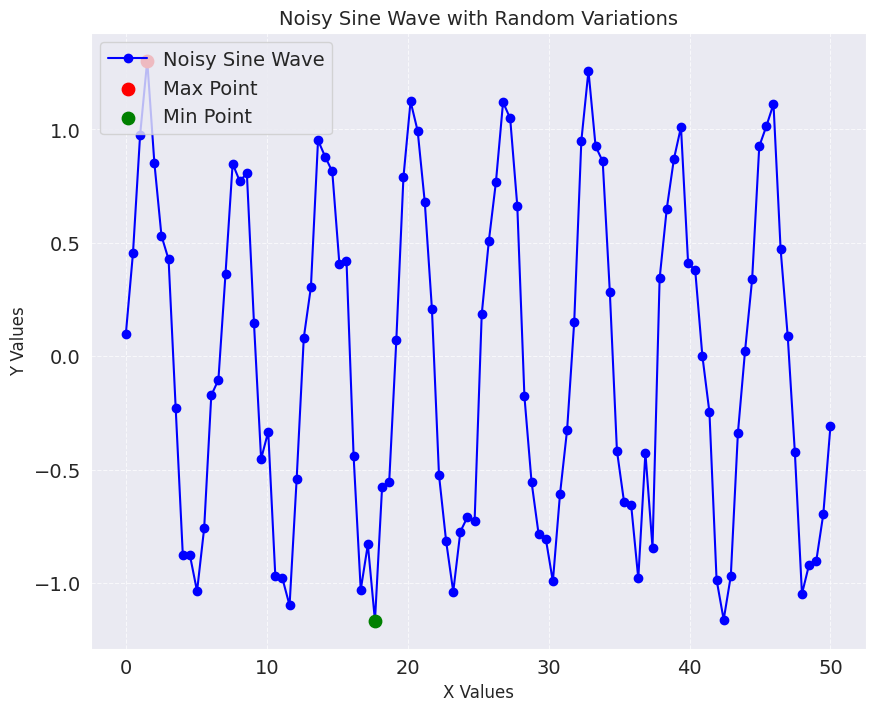

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the plot
np.random.seed(42)
x = np.linspace(0, 50, 100)
y = np.sin(x) + np.random.normal(scale=0.2, size=100)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data
ax.plot(x, y, marker='o', linestyle='-', color='b', label='Noisy Sine Wave')

# Add labels and title
ax.set_xlabel("X Values", fontsize=12)
ax.set_ylabel("Y Values", fontsize=12)
ax.set_title("Noisy Sine Wave with Random Variations", fontsize=14)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Highlight max and min points
ax.scatter(x[np.argmax(y)], max(y), color='red', label='Max Point', s=80, zorder=3)
ax.scatter(x[np.argmin(y)], min(y), color='green', label='Min Point', s=80, zorder=3)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [14]:
import seaborn as sns
df = sns.load_dataset('tips')
df = df.sample(n=50, random_state=1)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3


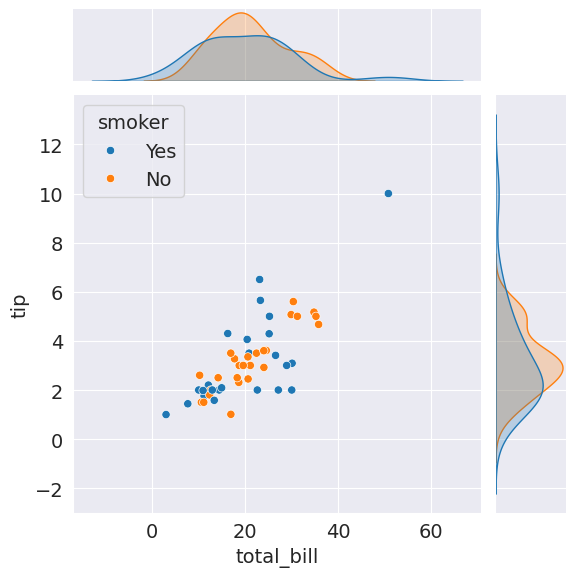

In [15]:
sns.jointplot(data=df, y='tip', x='total_bill', hue='smoker')
plt.show()

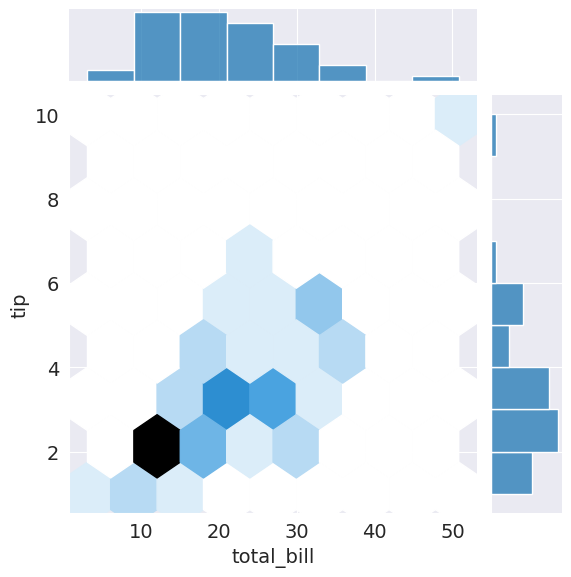

In [16]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='hex')
plt.show()

/tmp/ipykernel_25727/3244858265.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  x, y = rng.multivariate_normal(mean, cov, n).T


<Axes: >

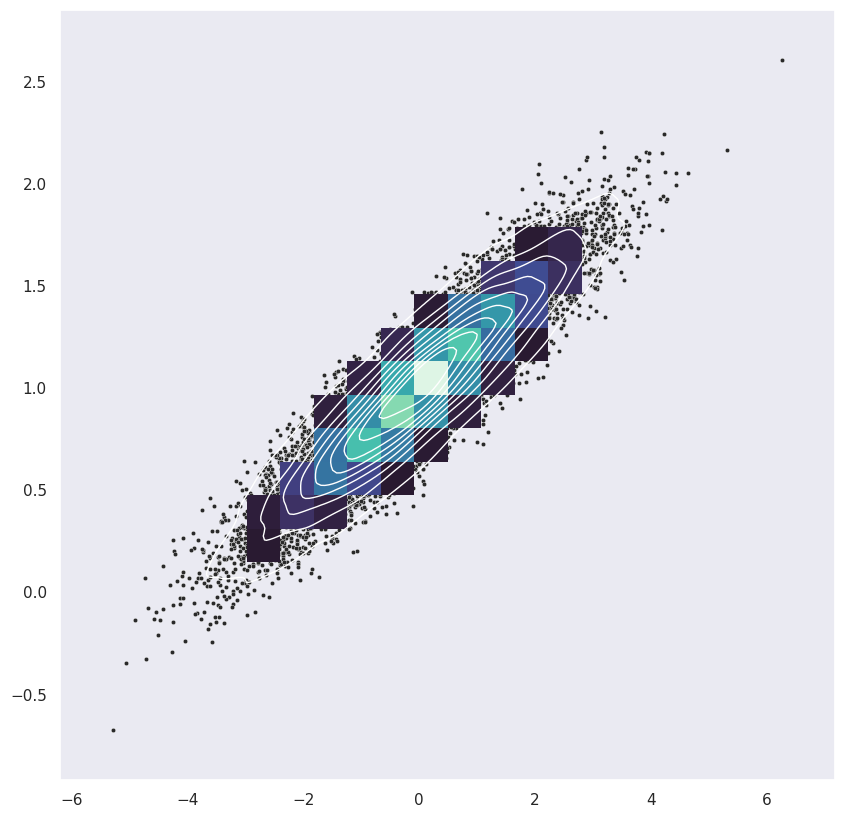

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 1]
cov = [(2, .5), (.5, .1)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=x, y=y, s=10, color=".16")
sns.histplot(x=x, y=y, bins=20, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=10, color="w", linewidths=1)

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px # Interactive charts and save some coding; .express - high-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Change settings to improve default style (optional)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
data_path = r'/workspaces/test-repo-tut1-2/FileX/medical-charges.csv'

In [21]:
medical_df = pd.read_csv(data_path)

In [22]:
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))


0.2990081933306476
0.19834096883362878
0.06799822684790469


In [23]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
print(medical_df['charges'].corr(smoker_numeric))

0.7872514304984782


In [24]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


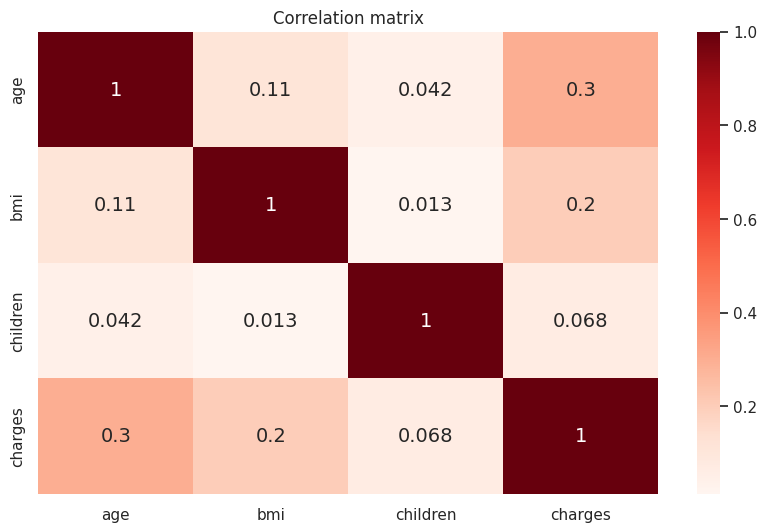

In [25]:
sns.heatmap(
    medical_df.select_dtypes(include='number').corr(),
    cmap='Reds',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create a model variable and assign linear regression model to it
help(model.fit)



Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [37]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] # Either line will work. Just different syntaxes; But I like no 1 more.
non_smoker_df.head(7)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [38]:
inputs = non_smoker_df[['age']] # required to be 2D array. We want a dataframe, not a series.
targets = non_smoker_df['charges'] # There is only one dependent variable => no 2D notation is required.
print("Inputs shape", inputs.shape) # Output: (1064, 1) -> First number is how many lines; 2nd number is how many columns.
print("targets", targets.shape)

Inputs shape (1064, 1)
targets (1064,)


In [39]:
model.fit(inputs, targets)

LinearRegression()

In [41]:
model.predict(np.array([
    [20],
    [35],
    [65]
]))


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 3253.55770006,  7262.29139253, 15279.75877746])

In [42]:
predictions = model.predict(inputs)
print(predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [28]:
def rmse(targets, predictions):
    """
    Returns RMSE for targets and prediction values.
    """
    return np.sqrt(np.mean(np.square(predictions - targets)))
rmse(targets, predictions) # Output USD 4662.5. Meaning on average we are away from the target by this number.
#Model coefficients
# w:
print(model.coef_)
# b:
print(model.intercept_)

[267.24891283]
-2091.4205565650864
